In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys
sys.path.append("../") 
from wfslib.geometry import Geometry
from wfslib.wfs import WFSData
import pickle 

ModuleNotFoundError: No module named 'wfslib'

In [ ]:
def accuracy(original, getted):
    N = len(original)
    accuracy = (getted==answer).all(axis = 1)
    right = len(np.where(accuracy == True)[0])
    return right/N *100

In [2]:
sigma = 15
path = "../data/synthetic_data/0_%d_test.npy"%sigma
answer_path = "../data/synthetic_data/0_test.pkl"
arr = np.load(path)
wfs = WFSData(arr)

print(wfs.geometry.options)
wfs.geometry.set_options(swap =True, shift = (35,35), cell_width = 125, border = 80)
wfs.reference = 8
#wfs.domask = True
#plt.imshow(arr[0])
wfs.show_geometry(show_type = "offsets")

with open(answer_path, 'rb') as f:
    answer = pickle.load(f)
answer = answer[1:,1:].reshape(-1,2)
getted = np.asarray(wfs.offsets())

print("Accuracy on %d-sigma noised data: %f"%(sigma, accuracy(answer, getted)))

NameError: name 'WFSData' is not defined

..\wfslib\wfs.py:132: UserWarning: WARNING: Set the geometry for the file!
  warn("WARNING: Set the geometry for the file!", UserWarning)


{'border': 16.0, 'cell_width': 200.0, 'start_point': [290, 291]}


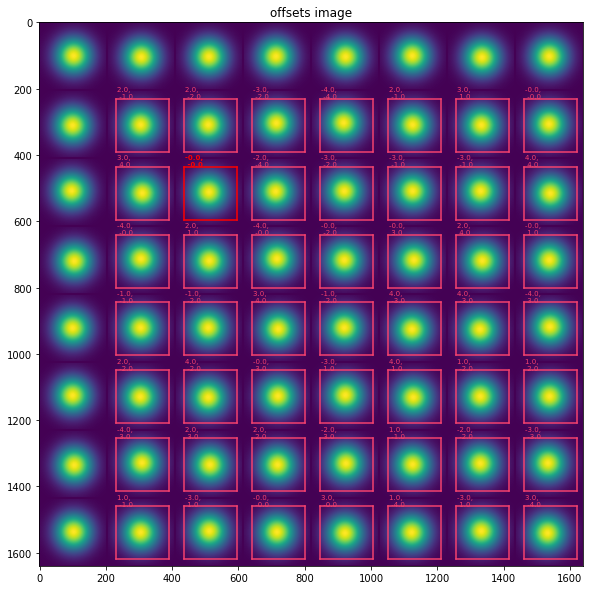

Accuracy on 38-sigma noised data: 100.000000


In [9]:
sigma = 38
path = "data/synthetic_data/0_%d_test.npy"%sigma
answer_path = "data/synthetic_data/0_test.pkl"
arr = np.load(path)
wfs = WFSData(arr)

print(wfs.geometry.options)
wfs.geometry.set_options(border = 45, cell_width = 160, shift = (100, 100))
wfs.reference = 8
#wfs.domask = True
#plt.imshow(arr[0])
wfs.show_geometry(show_type = "offsets")

with open(answer_path, 'rb') as f:
    answer = pickle.load(f)
answer = answer[1:,1:].reshape(-1,2)
getted = np.asarray(wfs.offsets())

print("Accuracy on %d-sigma noised data: %f"%(sigma, accuracy(answer, getted)))